In [26]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the breast cancer Wisconsin dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv(url, names=names)

# Select only the desired columns
X = df[['mean_concavity', 'mean_perimeter', 'mean_area', 'mean_radius', 'worst_perimeter']]
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Prompt the user to enter the values of the selected features
concavity_mean = float(input("Enter the concavity mean: "))
perimeter_mean = float(input("Enter the perimeter mean: "))
area_mean = float(input("Enter the area mean: "))
radius_mean = float(input("Enter the radius mean: "))
perimeter_worst = float(input("Enter the worst perimeter: "))

# Create a DataFrame with the user input data
new_data = pd.DataFrame({'mean_concavity': [concavity_mean],
                         'mean_perimeter': [perimeter_mean],
                         'mean_area': [area_mean],
                         'mean_radius': [radius_mean],
                         'worst_perimeter': [perimeter_worst]})



Enter the concavity mean: 0.15
Enter the perimeter mean: 101.2
Enter the area mean: 750
Enter the radius mean: 15
Enter the worst perimeter: 150


In [28]:
# Use the trained random forest classifier to predict the outcome
y_pred = rfc.predict(new_data)

print("The predicted diagnosis is:", y_pred[0])


The predicted diagnosis is: M


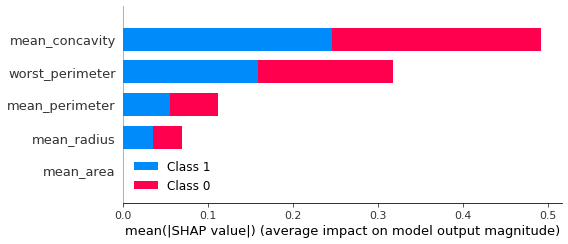

In [25]:
# Initialize SHAP explainer and get SHAP values for user input
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(new_data)

# Create a summary plot of SHAP values
shap.summary_plot(shap_values, new_data , plot_type='bar')